# Customer Churn Prediction (Bank Customers)

Objective: Predict whether a customer will leave the bank (churn).

## 1. Import Required Libraries
We import all necessary libraries for data handling, visualization, model training, and evaluation.

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2. Load the Dataset
Here we load the Churn Modelling dataset using pandas.

In [2]:
# Load dataset CSV file
df = pd.read_csv("E:\internship datasets\Churn_Modelling.csv")

# Display first 5 rows to understand the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Dataset Information
This step helps us understand columns, data types, and missing values.

In [3]:
# Check dataset shape (rows, columns)
df.shape

# Check column names
df.columns

# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 4. Data Cleaning
We remove unnecessary columns that do not contribute to prediction.

In [4]:
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Verify changes
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5. Encoding Categorical Variables
Convert categorical data into numerical form for machine learning models.

In [5]:
# Initialize Label Encoder for Gender column
le = LabelEncoder()

# Encode Gender (Male/Female -> 0/1)
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encode Geography column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Display encoded data
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


## 6. Feature Selection and Target Variable
Separate independent variables (X) and dependent variable (y).

In [6]:
# Features (all columns except target)
X = df.drop('Exited', axis=1)

# Target variable (Exited = 1 means customer left the bank)
y = df['Exited']

## 7. Train-Test Split
Split the data into training and testing sets.

In [7]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8. Model Training
Train a Random Forest Classifier for churn prediction.

In [8]:
# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Train model on training data
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 9. Model Evaluation
Evaluate the model using accuracy and classification report.

In [9]:
# Predict churn on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## 10. Feature Importance Analysis
Identify which features have the most impact on churn prediction.

In [10]:
# Extract feature importance values
importances = model.feature_importances_

# Create DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
feature_importance_df

,Feature,Importance
2,Age,0.239783
8,EstimatedSalary,0.146638
0,CreditScore,0.144214
4,Balance,0.138613
5,NumOfProducts,0.130255
3,Tenure,0.082427
7,IsActiveMember,0.041110
9,Geography_Germany,0.025711
1,Gender,0.019258
6,HasCrCard,0.018722


## 11. Feature Importance Visualization
Visualize feature importance using a bar chart.

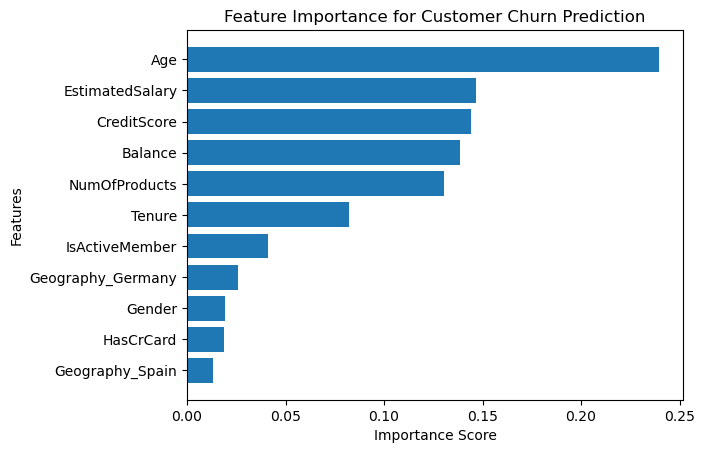

In [11]:
# Plot feature importance
plt.figure()
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Customer Churn Prediction')
plt.show()